In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
datas = pd.read_csv("Pélec_06_notebook.csv")
datas.head()

,OSEBuildingID,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,ENERGYSTARScore,SiteEUIkBtusf,SiteEUIWNkBtusf,SourceEUIkBtusf,SourceEUIWNkBtusf,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,SteamUsekBtu,ElectricitykBtu,NaturalGaskBtu,OtherFuelUsekBtu,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUIkBtusf_diff1516,SiteEUIWNkBtusf_diff1516,SourceEUIkBtusf_diff1516,SourceEUIWNkBtusf_diff1516,SiteEnergyUsekBtu_diff1516,SiteEnergyUseWNkBtu_diff1516,SteamUsekBtu_diff1516,ElectricitykBtu_diff1516,NaturalGaskBtu_diff1516,TotalGHGEmissions_diff1516,GHGEmissionsIntensity_diff1516
0,1,hotel,7.0,1927.0,1.0,12.0,88434.0,0.0,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,3686160.0,1272388.0,0.0,NaN,249.43,2.64,2.799997,4.000003,9.000000,13.9,244934.5,475482.0,0.0,259867.0,4065.0,0.55,0.19
1,2,hotel,7.0,1996.0,1.0,11.0,103566.0,15064.0,88502.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,3905411.0,4448985.0,0.0,NaN,263.51,2.38,0.400003,0.000000,0.000000,0.0,33698.0,310244.0,0.0,0.0,696097.0,32.35,0.48
2,3,hotel,7.0,1969.0,1.0,41.0,961990.0,0.0,961990.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,49762435.0,3709900.0,0.0,NaN,2061.48,1.92,0.000000,0.000000,0.000000,0.0,0.0,806456.0,1906150.0,0.0,0.0,27.80,0.27
3,8,hotel,7.0,1980.0,1.0,18.0,119890.0,12460.0,107430.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,6066245.0,8763105.0,0.0,NaN,507.70,4.02,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,40893.0,0.00,0.00
4,9,other,7.0,1999.0,1.0,2.0,97288.0,37198.0,60090.0,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,7271004.0,4781283.0,0.0,NaN,304.62,2.81,0.400006,0.000000,2.799988,0.0,34632.0,529728.0,0.0,100430.0,0.0,0.00,0.29


Classement des variables

In [2]:
nom_features = ["PrimaryPropertyType", "CouncilDistrictCode", "Outlier" 
    ]
ord_features = ["YearBuilt", "NumberofFloors", "NumberofBuildings", 
    ]
num_features = ["PropertyGFATotal", "PropertyGFABuildings", "PropertyGFAParking", 
    ]
num_features_a_diss = ["SiteEUIkBtusf_diff1516", "SiteEUIWNkBtusf_diff1516", "SourceEUIkBtusf_diff1516", "SourceEUIWNkBtusf_diff1516", 
    "SiteEnergyUsekBtu_diff1516", "SiteEnergyUseWNkBtu_diff1516", "SteamUsekBtu_diff1516", "ElectricitykBtu_diff1516", 
    "NaturalGaskBtu_diff1516", "TotalGHGEmissions_diff1516", "GHGEmissionsIntensity_diff1516", 

    "SteamUsekBtu", "ElectricitykBtu", "NaturalGaskBtu", "OtherFuelUsekBtu"
    ]
a_exclure = ["SiteEUIkBtusf", "SiteEUIWNkBtusf", "SourceEUIkBtusf", "SourceEUIWNkBtusf", "TotalGHGEmissions", "GHGEmissionsIntensity", 
    "SiteEnergyUsekBtu", "SiteEnergyUseWNkBtu"
    ]
cible = ["SiteEnergyUsekBtu"]

In [3]:
def convert_nan(data, cols=None):
    if type(data) == pd.DataFrame:
        if cols is None:
            cols = data.columns
        for col in cols:
            if data[col].dtypes == np.object_:
                data.loc[(data[col].isnull()) | (data[col] == np.inf) | (data[col] == -np.inf), col] = "nan"
            else:
                if data[col].dtypes == np.int64:
                    data[col] = data[col].astype(np.float64)
                data.loc[(data[col].isnull()) | (data[col] < 0), col] = 0
                data[col].replace([-np.inf], 0, inplace=True)
                maxi = data.loc[data[col] != np.inf, col].max()
                data[col].replace([np.inf], maxi, inplace=True)

    else:
        if data.dtypes == np.object_:
            data.replace(np.nan, "nan", inplace=True)
        else:
            data.replace([np.nan, -np.inf], 0, inplace=True)
            maxi = data[data != np.inf].max()
            data.replace([np.inf], data.max(), inplace=True)

    return data

In [4]:
def histogr(datas, cols):
    nb_classes = round(1 + np.log2(len(datas))) * 2

    plt_cols_full = len(cols) // 3
    if len(cols) % 3 != 0:
        plt_col_suppl = 1
    else:
        plt_col_suppl = 0
    plt_cols = plt_cols_full + plt_col_suppl

    fig = plt.figure(figsize=(15, 5 * plt_cols))
    for num, col in enumerate(cols):
        ax = fig.add_subplot(plt_cols, 3, num+1)
        skew = round(datas[col].skew(), 3)
        kurt = round(datas[col].kurtosis(), 3)
        ax.hist(datas[col], bins=nb_classes, label= f"Skewness: {skew}\nKurtosis: {kurt}")
        ax.set_title(col, fontsize=14)
        ax.legend()

In [5]:
n_datas = datas.copy()

cat_features = nom_features + ord_features

n_datas = convert_nan(n_datas, cat_features)
n_datas = convert_nan(n_datas, num_features)
n_datas = convert_nan(n_datas, num_features_a_diss)
n_datas = convert_nan(n_datas, a_exclure)
n_datas = convert_nan(n_datas, cible)


## Outliers

Comme vu précédemment, il semble y avoir des outliers sur la variables "SiteEnergyUsekBtu". Les valeurs de cette dernière semblent être comprises entre -4 et 4 une fois normalisées par la classe QuantileTransformer de sklearn.

### Pour rappel, la limite des outliers à été fixée à 3 écart-types

Nous allons retirer ces outliers


In [6]:
from sklearn.preprocessing import QuantileTransformer

n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[cible])
n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)


## Création de nouvelles variables

In [7]:
new_datas = n_datas[["PrimaryPropertyType", "YearBuilt"]].copy()
new_datas["GFAperFloor"] = n_datas["PropertyGFABuildings"] / n_datas["NumberofFloors"]
new_datas["GFAperBuilding"] = n_datas["PropertyGFABuildings"] / n_datas["NumberofBuildings"]
new_datas["HasParking"] = n_datas["PropertyGFAParking"].mask(n_datas["PropertyGFAParking"] != 0, 1)
new_datas["percGFABuilding"] = n_datas["PropertyGFABuildings"] / n_datas["PropertyGFATotal"]
new_datas["percGFAParking"] = n_datas["PropertyGFAParking"] / n_datas["PropertyGFATotal"]

new_datas = convert_nan(new_datas, new_datas.columns)

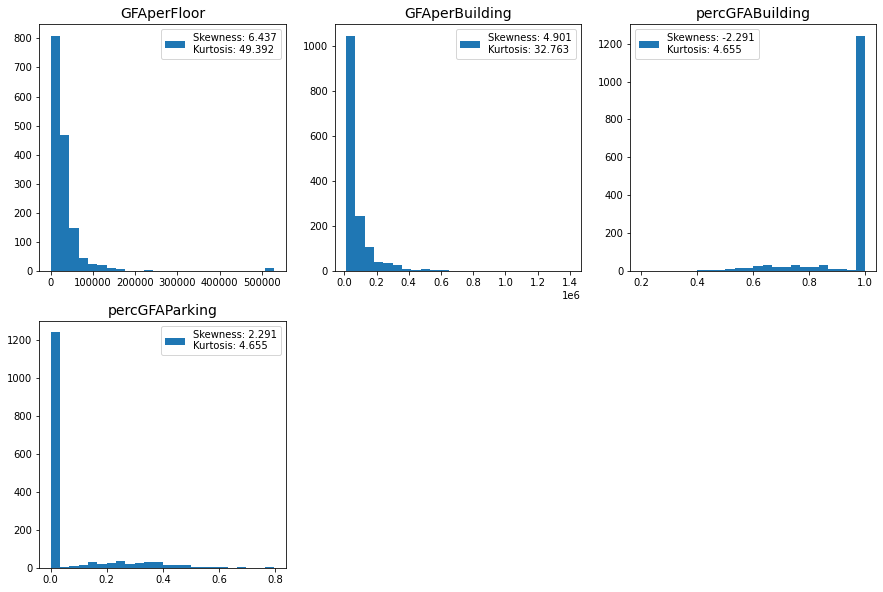

In [8]:
histogr(new_datas, ["GFAperFloor", "GFAperBuilding", "percGFABuilding", "percGFAParking"])

On peut voir que "GFAperFloor" et "GFAperBuilding" sont très concentrée à gauche avec des valeurs extrêmes.

Quant à "percGFABuilding" et "percGFAParking", ces dernières sont inversées ce qui est logique étant donné que ces deux variables sont directement corrélées à la présence ou non de parking

Je vais quand même les normaliser pour avoir un aperçu

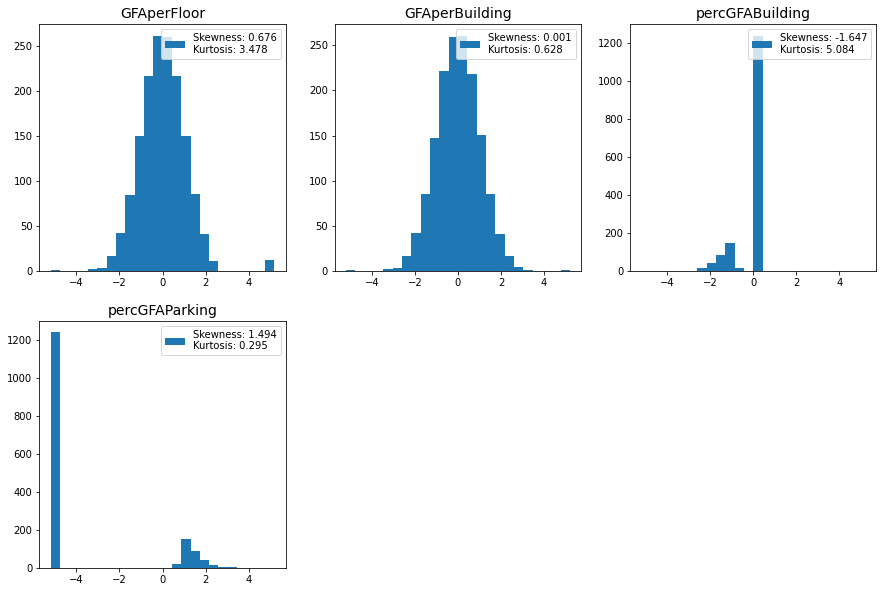

In [9]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[["GFAperFloor", "GFAperBuilding", 
    "percGFABuilding", "percGFAParking"]]), columns=["GFAperFloor", "GFAperBuilding", "percGFABuilding", "percGFAParking"])

histogr(tmp_datas, tmp_datas.columns)

"GFAperFloor" et "GFAperBuilding" semblent présenter des outliers en dessous de -4 et au dessus de 4. Ce sera des valeurs à retirer.

Ce processus d'analyse sera suivi à chaque création de nouvelle variable.

La création des nouvelles variables peut être sujette à du data leakage dû à l'utilisation des variables d'énergie, il faut que je les dissocie des types de bâtiments et/ou des années de construction pour pouvoir m'en servir

In [10]:
init_datas = n_datas[["PrimaryPropertyType", "YearBuilt", 
    "SteamUsekBtu", "ElectricitykBtu", "NaturalGaskBtu", "OtherFuelUsekBtu",
    "SiteEnergyUsekBtu", "SiteEnergyUseWNkBtu", 
    "SiteEUIkBtusf_diff1516", "SiteEUIWNkBtusf_diff1516", "SourceEUIkBtusf_diff1516", "SourceEUIWNkBtusf_diff1516", 
    "SiteEnergyUsekBtu_diff1516", "SiteEnergyUseWNkBtu_diff1516", 
    "SteamUsekBtu_diff1516", "ElectricitykBtu_diff1516", "NaturalGaskBtu_diff1516"
    ]]

init_grp = init_datas.groupby(["YearBuilt", "PrimaryPropertyType"]).std(ddof=0).mean()
print(f"Grp by YearBuilt et PrimaryPropertyType\n{init_grp}")

Grp by YearBuilt et PrimaryPropertyType
SteamUsekBtu                    1.356010e+05
ElectricitykBtu                 1.200545e+06
NaturalGaskBtu                  5.050294e+05
OtherFuelUsekBtu                4.133225e+03
SiteEnergyUsekBtu               1.635115e+06
SiteEnergyUseWNkBtu             1.714453e+06
SiteEUIkBtusf_diff1516          1.523852e+00
SiteEUIWNkBtusf_diff1516        1.519072e+00
SourceEUIkBtusf_diff1516        3.503666e+00
SourceEUIWNkBtusf_diff1516      3.670322e+00
SiteEnergyUsekBtu_diff1516      1.419443e+05
SiteEnergyUseWNkBtu_diff1516    1.924437e+05
SteamUsekBtu_diff1516           2.581279e+04
ElectricitykBtu_diff1516        9.066339e+04
NaturalGaskBtu_diff1516         5.641290e+04
dtype: float64


In [11]:

init_grp = init_datas.groupby(["YearBuilt"]).std(ddof=0).mean()
print(f"Grp by YearBuilt\n{init_grp}")


Grp by YearBuilt
SteamUsekBtu                    7.947196e+05
ElectricitykBtu                 5.149141e+06
NaturalGaskBtu                  2.061615e+06
OtherFuelUsekBtu                4.582768e+04
SiteEnergyUsekBtu               6.948782e+06
SiteEnergyUseWNkBtu             7.180339e+06
SiteEUIkBtusf_diff1516          7.154168e+00
SiteEUIWNkBtusf_diff1516        7.298491e+00
SourceEUIkBtusf_diff1516        1.489288e+01
SourceEUIWNkBtusf_diff1516      1.570322e+01
SiteEnergyUsekBtu_diff1516      6.478990e+05
SiteEnergyUseWNkBtu_diff1516    7.643954e+05
SteamUsekBtu_diff1516           9.993102e+04
ElectricitykBtu_diff1516        3.876246e+05
NaturalGaskBtu_diff1516         2.223709e+05
dtype: float64


In [12]:

init_grp = init_datas.groupby(["PrimaryPropertyType"]).std(ddof=0).mean()
print(f"Grp by PrimaryPropertyType\n{init_grp}")

Grp by PrimaryPropertyType
YearBuilt                       2.465259e+01
SteamUsekBtu                    8.371919e+05
ElectricitykBtu                 4.414646e+06
NaturalGaskBtu                  2.662967e+06
OtherFuelUsekBtu                4.007598e+04
SiteEnergyUsekBtu               6.725382e+06
SiteEnergyUseWNkBtu             7.074520e+06
SiteEUIkBtusf_diff1516          6.957284e+00
SiteEUIWNkBtusf_diff1516        7.168385e+00
SourceEUIkBtusf_diff1516        1.601487e+01
SourceEUIWNkBtusf_diff1516      1.658668e+01
SiteEnergyUsekBtu_diff1516      6.272762e+05
SiteEnergyUseWNkBtu_diff1516    7.207853e+05
SteamUsekBtu_diff1516           1.004811e+05
ElectricitykBtu_diff1516        4.387886e+05
NaturalGaskBtu_diff1516         2.526792e+05
dtype: float64


Le résultat le plus probant, c'est-à-dire avec une moyenne d'écart-types la plus faible est en groupant les variables par "PrimaryPropertyType" et "YearBuilt"

In [13]:
init_grp = init_datas.groupby(["YearBuilt", "PrimaryPropertyType"]).mean().reset_index()

new_datas = new_datas.merge(init_grp, how="outer", on=["YearBuilt", "PrimaryPropertyType"])

Je peux maintenant créer de nouvelles variables sans risque de data leakage

In [14]:
new_datas["SteamperGFA"] = new_datas["SteamUsekBtu"] / n_datas["PropertyGFATotal"]
new_datas["ElecperGFA"] = new_datas["ElectricitykBtu"] / n_datas["PropertyGFATotal"]
new_datas["GasperGFA"] = new_datas["NaturalGaskBtu"] / n_datas["PropertyGFATotal"]
new_datas["FuelperGFA"] = new_datas["OtherFuelUsekBtu"] / n_datas["PropertyGFATotal"]

new_datas["percSteam"] = new_datas["SteamUsekBtu"] / new_datas["SiteEnergyUsekBtu"]
new_datas["percElec"] = new_datas["ElectricitykBtu"] / new_datas["SiteEnergyUsekBtu"]
new_datas["percGas"] = new_datas["NaturalGaskBtu"] / new_datas["SiteEnergyUsekBtu"]
new_datas["percFuel"] = new_datas["OtherFuelUsekBtu"] / new_datas["SiteEnergyUsekBtu"]

new_datas = convert_nan(new_datas, new_datas.columns)

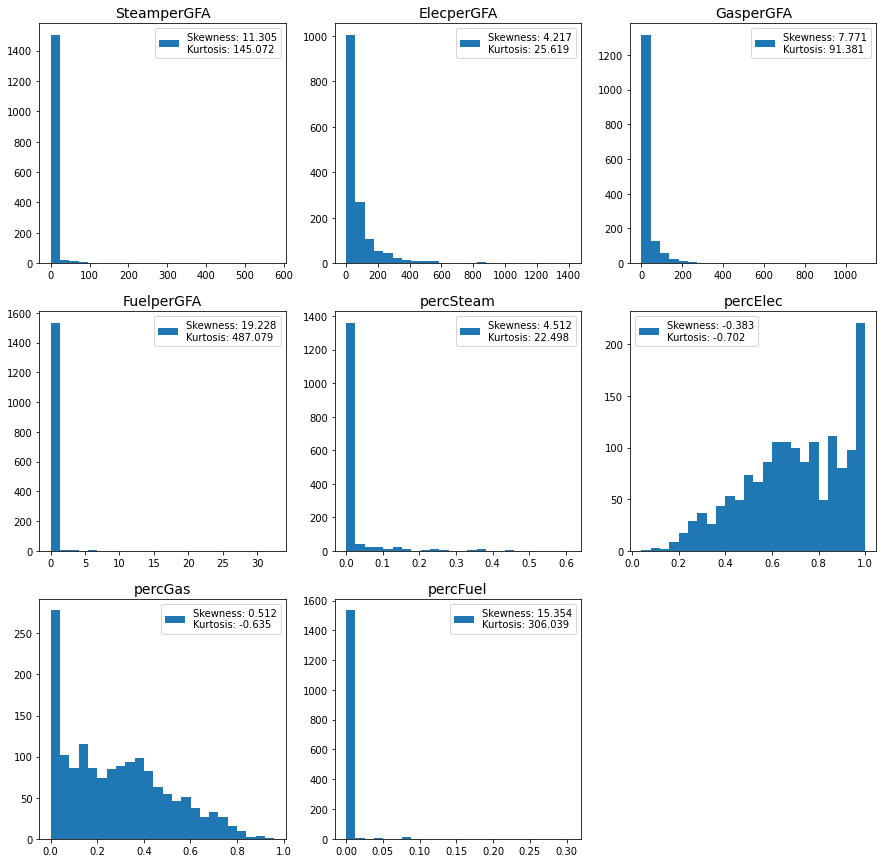

In [15]:
histogr(new_datas, ["SteamperGFA", "ElecperGFA", "GasperGFA", "FuelperGFA", "percSteam", "percElec", "percGas", "percFuel"])

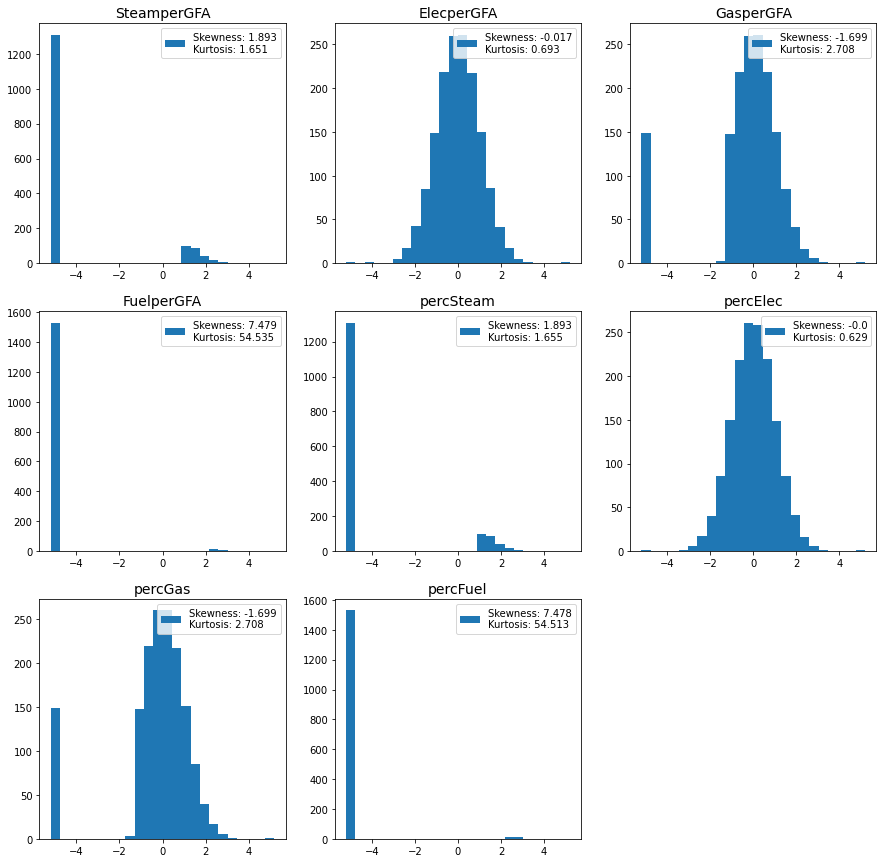

In [16]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[["SteamperGFA", "ElecperGFA", 
    "GasperGFA", "FuelperGFA", "percSteam", "percElec", "percGas", "percFuel"]]), columns=["SteamperGFA", "ElecperGFA", "GasperGFA", 
    "FuelperGFA", "percSteam", "percElec", "percGas", "percFuel"])

histogr(tmp_datas, tmp_datas.columns)

En ce qui concerne les variables dérivées de Steam et Fuel, la présence de très nombreux outliers (surtout bas) sont clairements visibles. Ces variables ne seront probablement pas intégrées à la modélisation

En ce qui concerne les variables dérivées d'Electricity et de Gas, la distribution normalisée est bien régulière avec la présence de quelques outliers qui seront retirés (légèrement plus pour les variables issues de Gas) mais rien de particulièrement gênant

### Variables normailsées sur le temps des 30 dernières années

In [17]:
new_datas["WNfactor"] = new_datas["SiteEnergyUsekBtu"] / new_datas["SiteEnergyUseWNkBtu"]

In [18]:
new_datas["SteamWN"] = new_datas["SteamUsekBtu"] / new_datas["WNfactor"]
new_datas["ElecWN"] = new_datas["ElectricitykBtu"] / new_datas["WNfactor"]
new_datas["GasWN"] = new_datas["NaturalGaskBtu"] / new_datas["WNfactor"]
new_datas["FuelWN"] = new_datas["OtherFuelUsekBtu"] / new_datas["WNfactor"]

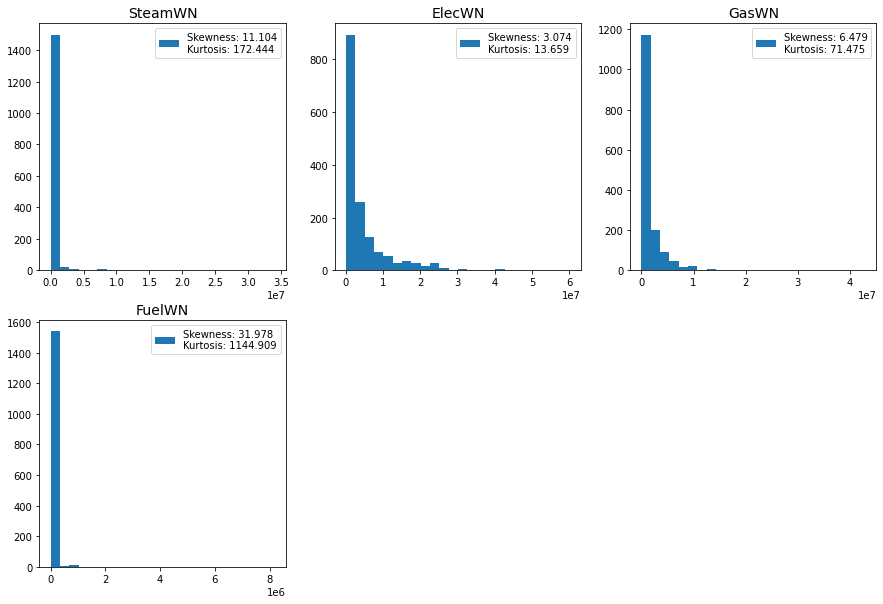

In [19]:
histogr(new_datas, ["SteamWN", "ElecWN", "GasWN", "FuelWN"])

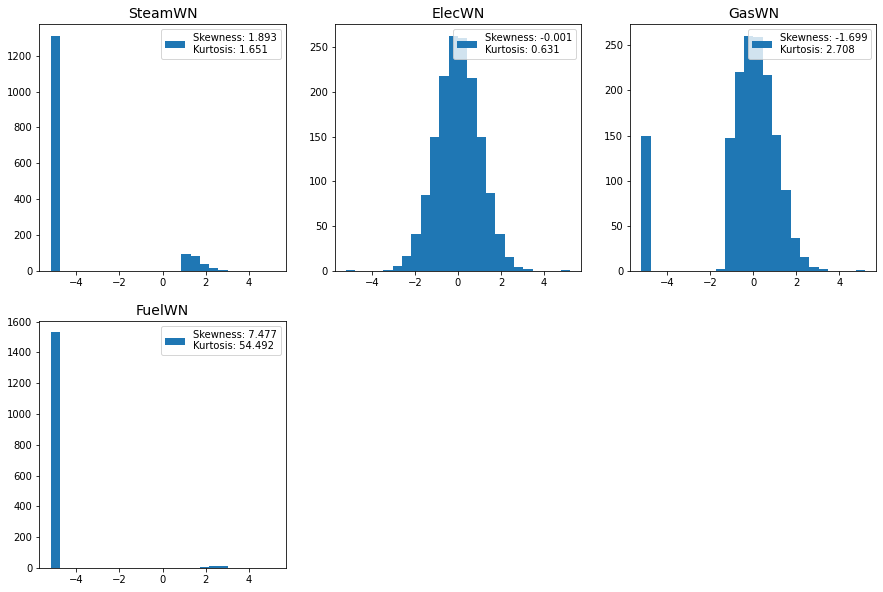

In [20]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[["SteamWN", "ElecWN", 
    "GasWN", "FuelWN"]]), columns=["SteamWN", "ElecWN", "GasWN", "FuelWN"])

histogr(tmp_datas, tmp_datas.columns)

In [21]:
new_datas["SteamWNperGFA"] = new_datas["SteamWN"] / n_datas["PropertyGFATotal"]
new_datas["ElecWNperGFA"] = new_datas["ElecWN"] / n_datas["PropertyGFATotal"]
new_datas["GasWNperGFA"] = new_datas["GasWN"] / n_datas["PropertyGFATotal"]
new_datas["FuelWNperGFA"] = new_datas["FuelWN"] / n_datas["PropertyGFATotal"]

new_datas = convert_nan(new_datas, new_datas.columns)


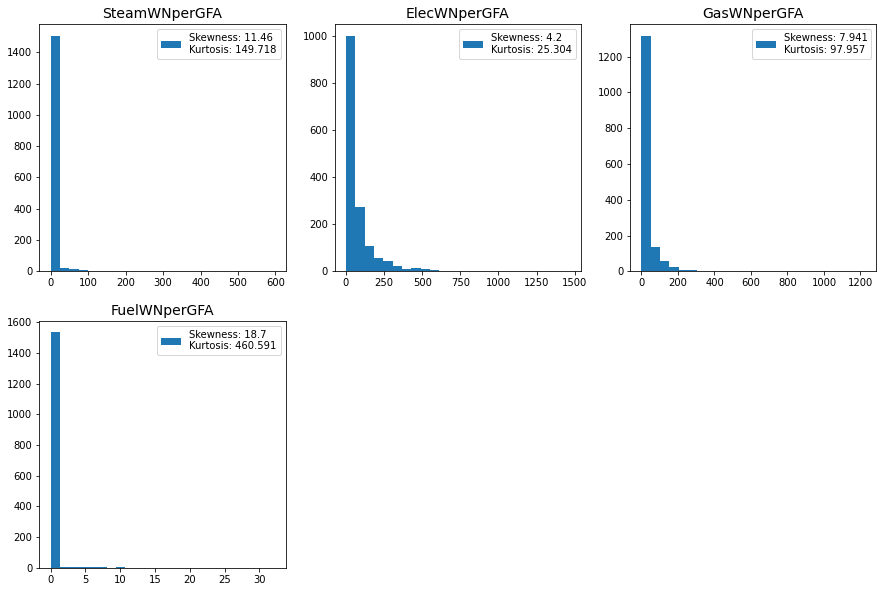

In [22]:
histogr(new_datas, ["SteamWNperGFA", "ElecWNperGFA", "GasWNperGFA", "FuelWNperGFA"])

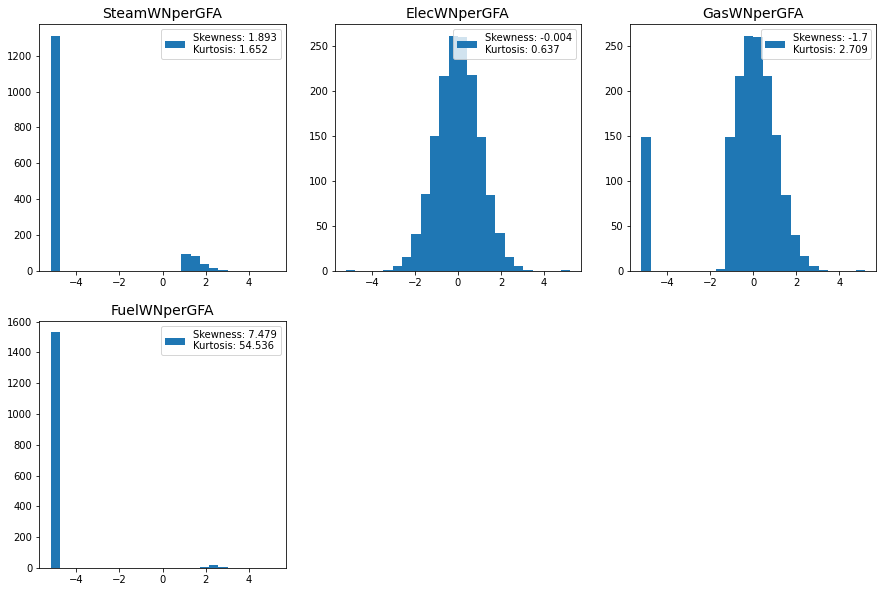

In [23]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[["SteamWNperGFA", "ElecWNperGFA", 
    "GasWNperGFA", "FuelWNperGFA"]]), columns=["SteamWNperGFA", "ElecWNperGFA", "GasWNperGFA", "FuelWNperGFA"])

histogr(tmp_datas, tmp_datas.columns)

In [24]:
new_datas["percSteamWN"] = new_datas["SteamWN"] / new_datas["SiteEnergyUseWNkBtu"]
new_datas["percElecWN"] = new_datas["ElecWN"] / new_datas["SiteEnergyUseWNkBtu"]
new_datas["percGasWN"] = new_datas["GasWN"] / new_datas["SiteEnergyUseWNkBtu"]
new_datas["percFuelWN"] = new_datas["FuelWN"] / new_datas["SiteEnergyUseWNkBtu"]

new_datas = convert_nan(new_datas, new_datas.columns)

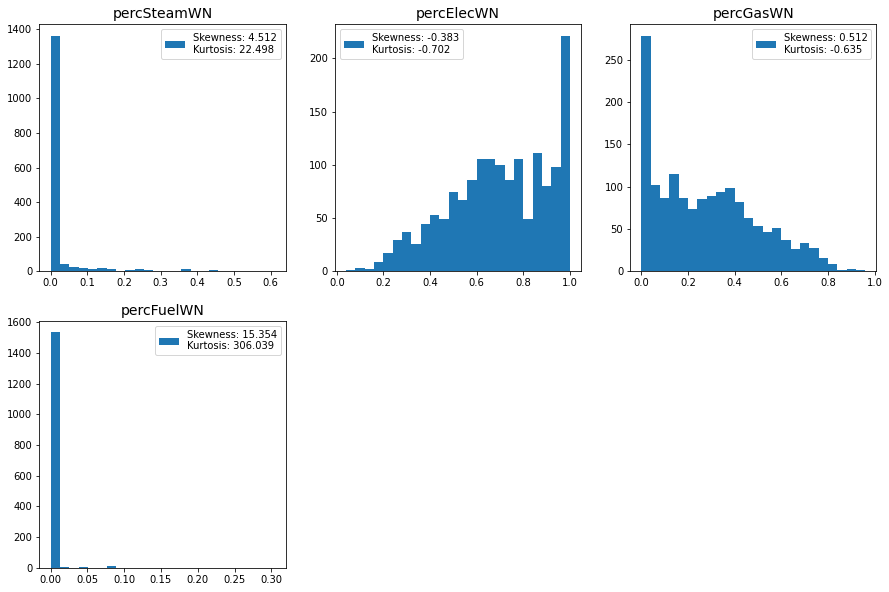

In [25]:
histogr(new_datas, ["percSteamWN", "percElecWN", "percGasWN", "percFuelWN"])

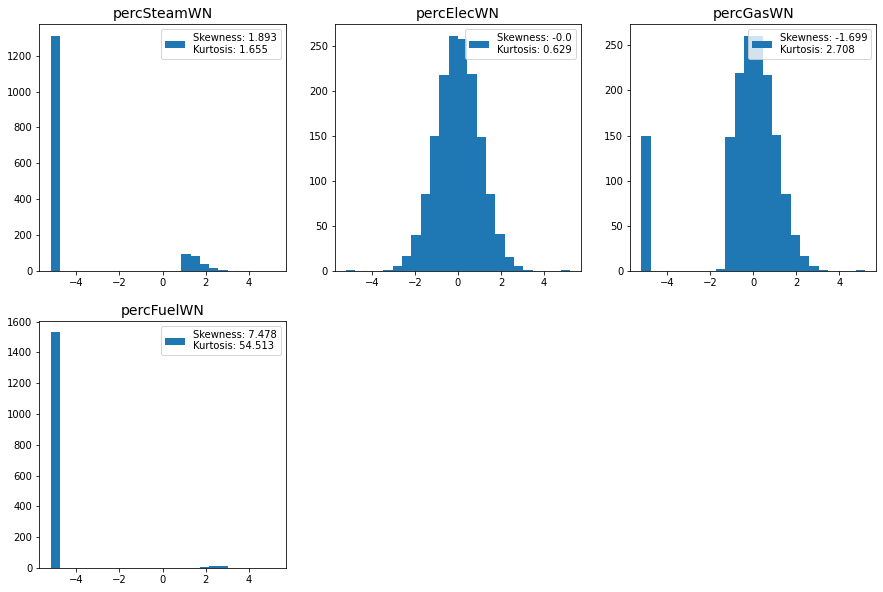

In [26]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[["percSteamWN", "percElecWN", 
    "percGasWN", "percFuelWN"]]), columns=["percSteamWN", "percElecWN", "percGasWN", "percFuelWN"])

histogr(tmp_datas, tmp_datas.columns)

Comme on pouvait s'en douter, les variables suivent les mêmes distributions que leurs homologues non normalisées sur les 30 dernières années ci-dessus avec les mêmes conclusions

In [27]:
new_datas = new_datas.drop(columns=["PrimaryPropertyType", "YearBuilt", 
    "SteamUsekBtu", "ElectricitykBtu", "NaturalGaskBtu", "OtherFuelUsekBtu",
    "SiteEnergyUsekBtu", "SiteEnergyUseWNkBtu", ])

n_datas = n_datas.drop(columns=num_features_a_diss)


<AxesSubplot:>

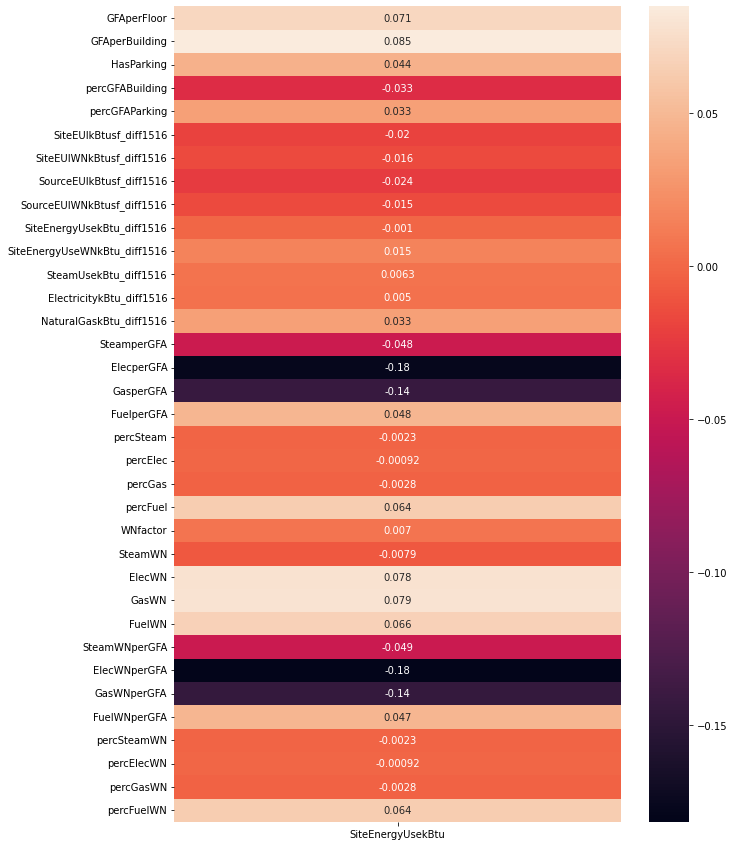

In [28]:
import seaborn as sns

tmp_num = new_datas.copy()

tmp_num[cible] = n_datas[cible]

corr_num = tmp_num.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,15))
sns.heatmap(corr_num, annot=True)

In [29]:
f_datas = n_datas.merge(new_datas, how= "outer", left_index=True, right_index=True)
f_datas = f_datas.drop(columns="transf")

f_datas = convert_nan(f_datas, f_datas.columns)

In [30]:
f_datas.to_csv("Pélec_08_conso_train.csv", index=False)